In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

The dataset contains 284,807 credit card transactions with 31 columns, including PCA-transformed features (V1 to V28), Time, Amount, and the target variable Class (0 = legitimate, 1 = fraud). It has no missing values and is highly imbalanced, as fraudulent transactions are rare. The goal is to build a fraud detection model to classify transactions as legitimate or fraudulent, making it ideal for classification and anomaly detection tasks.

In [4]:
credit_card_data = pd.read_csv('/content/creditcard.csv.zip')
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#distribution of legit and fraudulent transaction
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [10]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [13]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [14]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
#Under Sampling
legit_sample = legit.sample(n=492)

In [16]:
new_set = pd.concat([legit_sample, fraud], axis=0)
new_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
120995,76040.0,-0.618057,-1.930419,-1.001159,-2.247004,1.503395,3.343269,-0.276812,0.714230,-2.553140,...,0.102586,0.044772,0.657593,0.982016,-0.299263,-0.122402,0.108720,0.215630,268.47,0
196713,131658.0,2.002278,0.237853,-1.186755,1.228662,0.305485,-0.824240,0.312773,-0.318888,0.057839,...,0.293752,0.989550,0.064759,1.119998,0.306989,-0.483199,0.006907,-0.038813,7.59,0
119487,75466.0,1.192045,0.633375,-0.553585,0.697082,0.450315,-0.637149,0.300948,-0.091788,-0.588941,...,-0.062725,-0.073630,-0.079182,-0.065287,0.503572,0.377795,-0.011177,0.031510,0.76,0
42657,41189.0,-0.738915,-4.362963,-2.790991,-0.767774,0.551591,3.576895,0.673878,0.403238,-1.031010,...,0.793738,-0.418104,-1.213093,1.115432,0.527724,-0.172513,-0.223796,0.197278,1159.67,0
73302,55077.0,1.241204,-0.555584,-0.155867,-0.334535,-0.500661,-0.255284,-0.256837,0.072919,-1.176014,...,-0.683937,-1.741348,0.189998,-0.405246,0.030379,0.174217,-0.047840,0.001027,52.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [17]:
new_set.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97002.569106,-0.040504,0.063063,0.015146,-0.048592,0.049218,0.002069,0.025443,-0.109854,0.037245,...,0.032084,0.055227,0.022449,-0.016351,0.01345,0.031164,-0.013513,-0.012185,0.015744,87.111829
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
feature_importance = pd.DataFrame({
    'feature': credit_card_data.columns[1:30],  # Exclude 'Time' and 'Class' columns
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

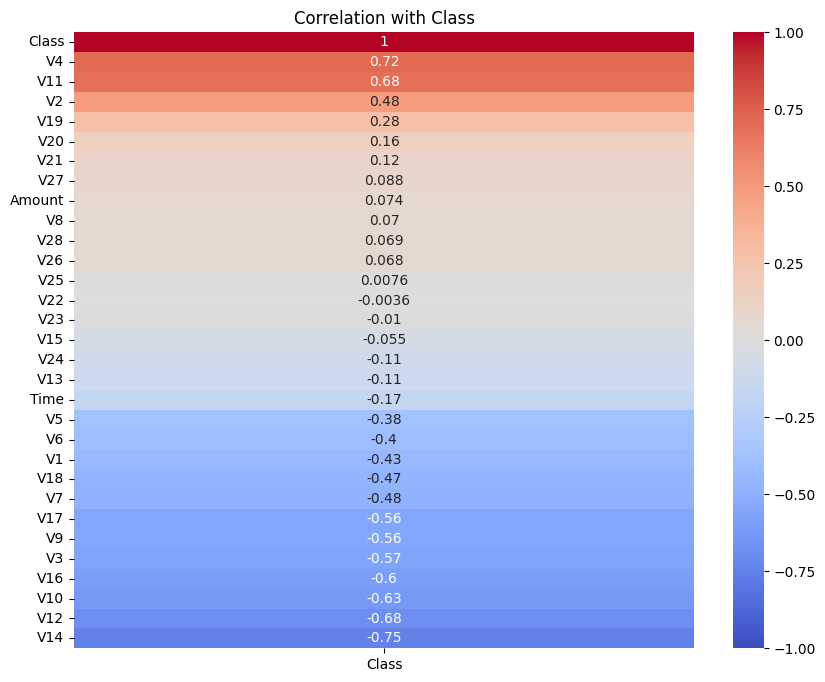

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(new_set.corr()[['Class']].sort_values(by='Class', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Class')
plt.show()

In [19]:
x=new_set.drop(columns=['V21','Amount','V28','V27','V26','V8','V22','V25','V13','V23','V15','V24','Time','Class'], axis=1)#features depending on high correlation
y=new_set['Class']

In [20]:
x

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20
120995,-0.618057,-1.930419,-1.001159,-2.247004,1.503395,3.343269,-0.276812,-2.553140,1.114886,-0.662712,-1.258819,-0.195099,-0.988615,0.579627,0.511083,1.132829,0.618923
196713,2.002278,0.237853,-1.186755,1.228662,0.305485,-0.824240,0.312773,0.057839,0.289946,-0.295934,0.775038,0.326065,-0.216066,-0.514054,-0.290202,-0.816086,-0.188715
119487,1.192045,0.633375,-0.553585,0.697082,0.450315,-0.637149,0.300948,-0.588941,-0.618636,2.290293,1.187037,-1.280737,0.406274,1.003756,0.184686,-0.441221,-0.023765
42657,-0.738915,-4.362963,-2.790991,-0.767774,0.551591,3.576895,0.673878,-1.031010,0.106257,-0.242602,-0.595974,0.193487,1.000315,0.153725,-0.988273,0.819760,2.511959
73302,1.241204,-0.555584,-0.155867,-0.334535,-0.500661,-0.255284,-0.256837,-1.176014,0.917509,0.840625,-0.436019,0.951637,-1.375762,0.033103,0.876772,-0.598369,-0.556375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,-2.064945,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,-1.315147,0.391167,1.252967
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,-1.127396,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,-0.688505,0.737657,0.226138
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,-0.652250,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,-0.507000,0.266272,0.247968
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,-1.632333,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,-1.478138,-0.035480,0.306271


In [21]:
y

,Class
120995,0
196713,0
119487,0
42657,0
73302,0
...,...
279863,1
280143,1
280149,1
281144,1


In [22]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [23]:
print(x.shape, x_train.shape, x_test.shape)

(984, 17) (787, 17) (197, 17)


In [24]:
print(y.shape, y_train.shape, y_test.shape)

(984,) (787,) (197,)


In [25]:
#logistic regression
model=LogisticRegression()

In [26]:
#train
model.fit(x_train, y_train)

LogisticRegression()

In [47]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_accuracy

0.9137055837563451

In [107]:
# Generate a random sample from the test set
import random
random_index = random.randint(0, len(x_test) - 1) #generate random from 0 to len -1
random_case = x_test.iloc[[random_index]]
random_case_actual = y_test.iloc[random_index]

# Make a prediction on the random case
random_case_prediction = model.predict(random_case)[0]

# Print the prediction and the actual value
print(f"Random Case Prediction: {random_case_prediction}")
print(f"Actual Value: {random_case_actual}")

# Compare the prediction and the actual value
if random_case_prediction == random_case_actual:
    print("Prediction is correct.")
else:
    print("Prediction is incorrect.")

Random Case Prediction: 0
Actual Value: 0
Prediction is correct.


In [122]:
x.describe() # for finding min and max of all features

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-2.406226,1.843421,-3.509067,2.246719,-1.551003,-0.697834,-2.771644,-1.271939,-2.810915,1.896654,-3.107455,-3.487581,-2.064584,-3.354321,-1.109147,0.319321,0.202202
std,5.503177,3.677977,6.229011,3.211736,4.212743,1.735806,5.856598,2.347877,4.579485,2.781744,4.606780,4.659450,3.479641,5.960521,2.406670,1.293517,1.080571
min,-30.552380,-9.857118,-31.103685,-5.600607,-22.105532,-6.406267,-43.557242,-13.434066,-24.588262,-2.247824,-18.683715,-19.214325,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186
25%,-2.922415,-0.092774,-5.113334,-0.152967,-1.733724,-1.559879,-3.103817,-2.294075,-4.572043,-0.226861,-5.495221,-6.721799,-3.543426,-5.302111,-1.772498,-0.493477,-0.189167
50%,-0.756302,0.975077,-1.279453,1.307692,-0.468460,-0.672929,-0.639300,-0.690535,-0.862617,1.111641,-0.831325,-1.017964,-0.631755,-0.544882,-0.336992,0.183447,0.039322
75%,0.944089,2.814266,0.304144,4.202830,0.493203,0.103120,0.301250,0.132432,0.009467,3.586130,0.249912,0.104926,0.279816,0.213556,0.333906,0.980929,0.427436
max,2.367345,22.057729,3.095618,12.114672,11.095089,6.474115,5.802537,7.668338,11.586302,12.018913,2.567399,3.442422,3.139656,6.739384,3.790316,5.228342,11.059004


In [121]:
# Generate a random sample with features as floats
random_case = pd.DataFrame({
    'V1': [random.uniform(-30.552380, 2.367345)],
    'V2': [random.uniform(-9.857118, 22.057729 )],
    'V3': [random.uniform(-31.103685, 3.095618)],
    'V4': [random.uniform(-5.600607, 12.114672)],
    'V5': [random.uniform(-22.105532, 11.095089)],
    'V6': [random.uniform(-6.406267, 6.474115)],
    'V7': [random.uniform(-43.557242, 5.802537)],
    'V9': [random.uniform(-13.434066, 7.668338)],
    'V10': [random.uniform(-24.588262, 11.586302)],
    'V11': [random.uniform(-2.247824, 12.018913)],
    'V12': [random.uniform(-18.683715, 2.567399)],
    'V14': [random.uniform(-19.214325, 3.442422)],
    'V16': [random.uniform(-14.129855, 3.139656)],
    'V17': [random.uniform(-25.162799, 6.739384)],
    'V18': [random.uniform(-9.498746, 3.790316)],
    'V19': [random.uniform(-3.681904, 5.228342)],
    'V20': [random.uniform(-4.128186, 11.059004)]
})

# Make a prediction on the random case
random_case_prediction = model.predict(random_case)[0]

# Print the prediction
print(f"Random Case Prediction: {random_case_prediction}")

Random Case Prediction: 1


In [124]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluate the accuracy
accuracy_rf = rf_model.score(x_test, y_test)
print("RandomForestClassifier Accuracy: {0:.5f}".format(accuracy_rf))

RandomForestClassifier Accuracy: 0.91878


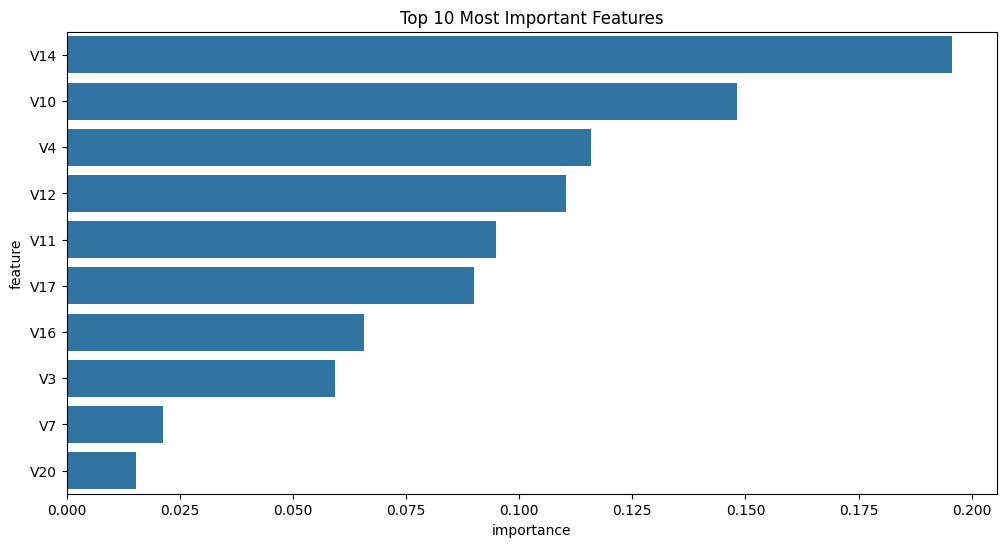

In [127]:
# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': x.columns,  # Use all feature columns from x
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot the top 10 most important features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()
